 ## 0. Подгрузка модулей

In [2]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# AER dataset


 ## 1.1. Подгрузка данных

In [3]:
df = pd.read_csv("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[11] AER_credit_card_data.csv",
                  sep = ',')

df = df.rename(columns={'card': 'target'})
df.head()

,target,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


## 1.2.  Предобработка данных

### Булевые переменные записываем в формате чисел.

In [4]:
df[df.columns[0]] = df[df.columns[0]].replace('yes', 0)
df[df.columns[0]] = df[df.columns[0]].replace('no', 1)
for item in df.columns[1:]:
    df[item] = df[item].replace('yes', 1)
    df[item] = df[item].replace('no', 0)

In [5]:
df.head()

,target,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,0,0,37.66667,4.5200,0.033270,124.983300,1,0,3,54,1,12
1,0,0,33.25000,2.4200,0.005217,9.854167,0,0,3,34,1,13
2,0,0,33.66667,4.5000,0.004156,15.000000,1,0,4,58,1,5
3,0,0,30.50000,2.5400,0.065214,137.869200,0,0,0,25,1,7
4,0,0,32.16667,9.7867,0.067051,546.503300,1,0,2,64,1,5


## 2.  Анализ факторов


### Список факторов



- card: Dummy variable, 1 if application for credit card accepted, 0 if not - __проинверсировали столбец, так как в нашем случае целью является дефолт или невыдача кредита, а не наоборот__
- reports: Number of major derogatory reports
- age: Age n years plus twelfths of a year
- income: Yearly income (divided by 10,000)
- share: Ratio of monthly credit card expenditure to yearly income
- expenditure: Average monthly credit card expenditure
- owner: 1 if owns their home, 0 if rent
- selfempl: 1 if self employed, 0 if not.
- dependents: 1 + number of dependents
- months: Months living at current address
- majorcards: Number of major credit cards held
- active: Number of active credit accounts

### Разбиваем на train/test, записываем типы переменных и сохраняем.

In [6]:
X = df.loc[:, df.columns != 'target']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir Users/vaneque/Desktop/L'ecole /Model risks/Data/
X_train.to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[11] AER/X_train.parquet")
X_test.to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[11] AER/X_test.parquet")
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[11] AER/y_train.parquet")
pd.DataFrame(y_test).to_parquet("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[11] AER/y_test.parquet")

# сохраняем списки категориальных и колич. переменных
cat_vals = []
num_vals = ['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
           'selfemp', 'dependents', 'months', 'majorcards', 'active']

with open("/Users/vaneque/Desktop/L'ecole /Model risks/Data/[11] AER/factors.json", 'w') as f:
    json.dump({'cat_vals': cat_vals, 'num_vals': num_vals}, f)

zsh:1: unmatched '


## 3. Статистики и пропуски

### Статистики

In [7]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий: {y.sum()}')
print(f'Доля целевых событий: {np.round(y.sum() / X.shape[0] * 100, 2)}%')

Количество наблюдений: 1319
Количество факторов: 11
Количество целевых событий: 296
Доля целевых событий: 22.44%


### Пропуски
Пропуски в данных отсутствуют.

In [8]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {(X[col].isna().sum() / df.shape[0] * 100):.2f}%')

Количество пропусков по фактору reports:
	0 или 0.00%
Количество пропусков по фактору age:
	0 или 0.00%
Количество пропусков по фактору income:
	0 или 0.00%
Количество пропусков по фактору share:
	0 или 0.00%
Количество пропусков по фактору expenditure:
	0 или 0.00%
Количество пропусков по фактору owner:
	0 или 0.00%
Количество пропусков по фактору selfemp:
	0 или 0.00%
Количество пропусков по фактору dependents:
	0 или 0.00%
Количество пропусков по фактору months:
	0 или 0.00%
Количество пропусков по фактору majorcards:
	0 или 0.00%
Количество пропусков по фактору active:
	0 или 0.00%


## 4. Визуальный анализ и выбросы

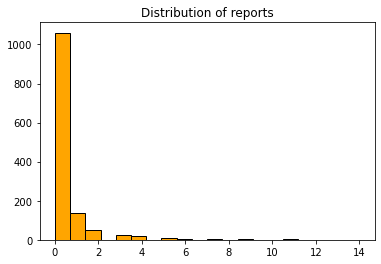

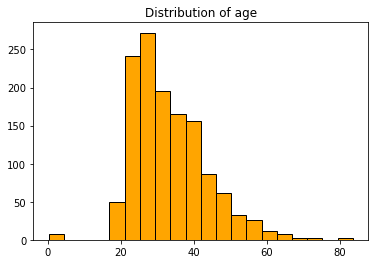

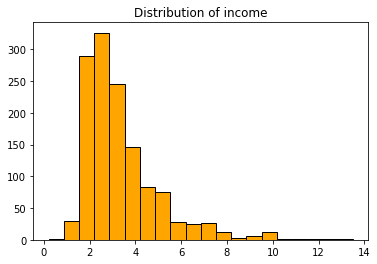

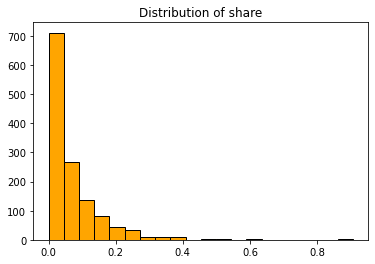

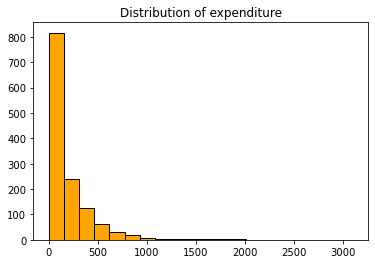

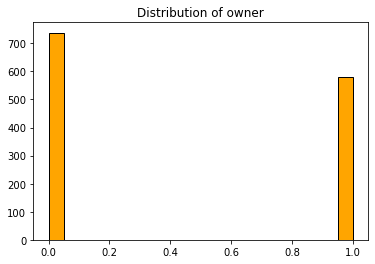

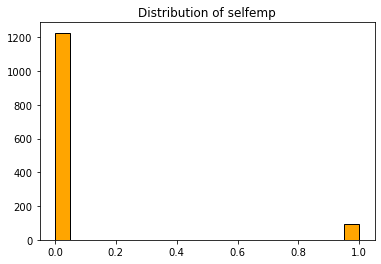

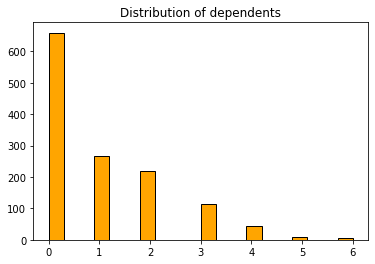

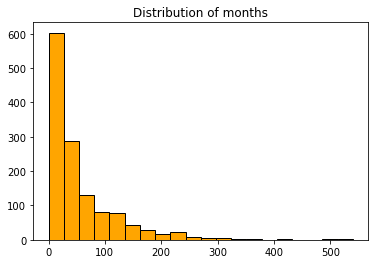

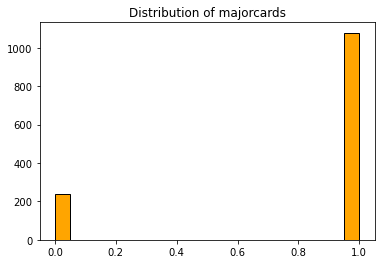

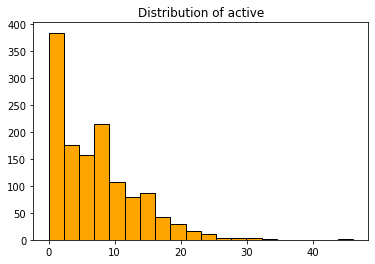

In [9]:
for col in X.columns:
    plt.hist(X[col], bins = 20,color='orange', ec='black' )
    plt.title(f'Distribution of {col}')
    plt.show()

Хорошие данные, выбросов нет.